# Funzioni trigonometriche

Dato un angolo $ \theta $ in gradi, compreso tra $ 0 $ e $ 360 $, calcolare il valore della funzione **coseno** e della funzione **seno**.

Disegnare un grafico che mostra un settore circolare che corrisponde all'angolo scelto e rappresenta, tramite proiezioni, il significato geometrico del coseno e del seno.

<div id = "immagine">

<img src = "Immagini/Funzioni_01.jpg" alt = "Immagine">

</div>

## Discussione del problema

Le funzioni trigonometriche **coseno** e **seno** sono disponibili come funzioni della libreria **numpy** di Python. L'argomento delle funzioni trigonometriche si intende espresso in **radianti**.

Dato il valore dell'angolo $ \theta $ in gradi:

* Convertiamo la misura in radianti tramite la relazione:

<div id = "colorbox">

$$ \theta_{rad} = \theta° \dfrac{\pi}{180°} $$

</div>

* Ed utilizziamo le funzioni **np.cos()** e **np.sin()** del modulo **numpy**.

Tramite il modulo **matplotlib** si può costruire un grafico che mostra un settore circolare corrispondente all'angolo scelto e che consente di illustrare il significato geometrico del coseno e del seno.

## Calcoli con Python


 &theta; = 0.78540 <b> rad </b> = 0.25000 &pi; <b> rad </b><br>

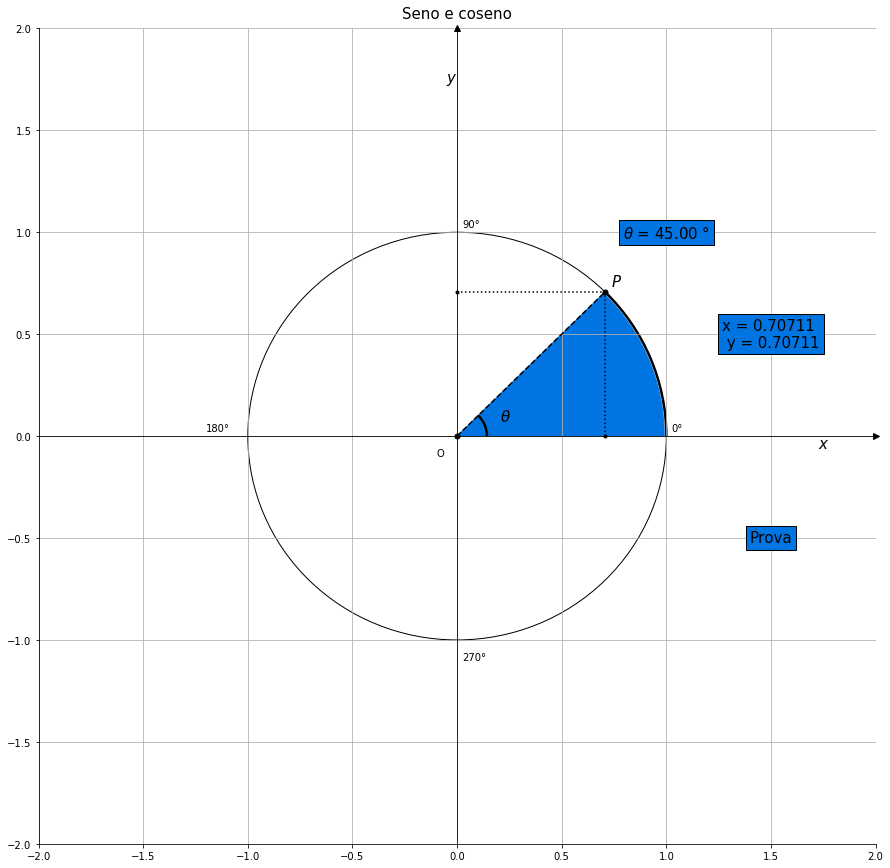

<function __main__.funzione(ang)>

In [274]:
# Utilizzato per importare la libreria adoperata per funzioni matematiche.
import numpy as np
# Utilizzato per importare la libreria adoperata per i widgets.
import ipywidgets as widgets
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare il Markdown con il Python.
from IPython.display import display, Markdown
# Utilizzato per importare la libreria adoperata per rappresentare graficamente le grandezze.
import matplotlib.pyplot as plt
# Utilizzati per importare dalla libreria la funzione adoperata per disegnare l'angolo.
from matplotlib import patches
from matplotlib.patches import Wedge


# Utilizzato per dimensionare la descrizione dello slider e lo slider.
style = {"description_width":"initial"}


# Utilizzato per creare uno slider (widget) adoperato per cambiare interattivamente il valore dell'angolo.
sliderAng = widgets.IntSlider(min = 0, max = 360, step = 1, value = 45,
                              description = "Angolo" + r"$ \theta $" + "(°)", style = style, continuous_update = False)


# Funzione.
def funzione(ang):
    ang_rad = ang * np.pi / 180 # Angolo in radianti.
    ang_over_pi = ang / 180 # Angolo in fraction of pi radians???.
    print()
    display(Markdown("\n &theta; = {0:0.5f} <b> rad </b> = {1:0.5f} &pi; <b> rad </b><br>".format(ang_rad, ang_over_pi))) # Utilizzato per stampare i risultati in Markdown.
    makeplot(ang) # Utilizzato per utilizzare la funzione grafico.

# Funzione grafico.
def makeplot(ang):
    ang_rad = ang * np.pi / 180 # Angolo in radianti.
    sen_ang, cos_ang = np.sin(ang_rad), np.cos(ang_rad) # Seno e coseno dell'angolo.
    fig, axes = plt.subplots(figsize = (15, 15)) # Utilizzato per numerare il grafico e dimensionarlo.
    axes.set_title("Seno e coseno", fontdict = {"fontsize": 15}, pad = 10) # Utilizzato per il titolo.
    plt.xlim(-2, 2) # Utilizzato per il limite della x.
    plt.ylim(-2, 2) # Utilizzato per il limite della y.
    axes.spines["top"].set_position(("data", 0)) # Utilizzato per???.
    axes.spines["right"].set_position(("data", 0)) # Utilizzato per???.
    axes.plot(1, 0, ">k", transform = axes.get_yaxis_transform(), clip_on = False) # Utilizzato per disegnare la freccia dell'asse x.
    axes.plot(0, 1, "^k", transform = axes.get_xaxis_transform(), clip_on = False) # Utilizzato per disegnare la freccia dell'asse y.
    axes.annotate(r"$ x $", (1.75, 0), fontsize = 15, verticalalignment = "top", horizontalalignment = "center") # Utilizzato per rappresentare la x nel grafico.
    axes.annotate(r"$ y $", (0, 1.75), fontsize = 15, verticalalignment = "center", horizontalalignment = "right") # Utilizzato per rappresentare la y nel grafico.
    axes.annotate("O", xy = (-0.1, -0.1)) # Utilizzato per rappresentare l'origine nel grafico.
    draw_circle = patches.Circle((0, 0), 1, fill = False) # Utilizzato per disegnare un cerchio.
    axes.add_artist(draw_circle) # Utilizzato per aggiungere il cerchio nel grafico.
    axes.annotate("0°", xy = (1.025, 0.025)) # Utilizzato per rappresentare 0° nel grafico.
    axes.annotate("90°", xy = (0.025, 1.025)) # Utilizzato per rappresentare 90° nel grafico.
    axes.annotate("180°", xy = (-1.2, 0.025)) # Utilizato per rappresentare 180° nel grafico.
    axes.annotate("270°", xy = (0.025, -1.1)) # Utilizzato per rappresentare 270° nel grafico.
    plt.plot([0, cos_ang], [0, sen_ang], 'o--', markersize = 5, color = "Black") # Utilizzato per disegnare il raggio.
    draw_wedge = patches.Wedge((0, 0), 0.99, 0, ang, color = "#0075E2") # Utilizzato per disegnare un angolo.
    axes.add_artist(draw_wedge) # Utilizzato per aggiungere l'angolo nel grafico.
    draw_arc01 = patches.Arc((0, 0), 2 / 7, 2 / 7, angle = 0.0, theta1 = 0.0, theta2 = ang, color = "Black", linewidth = 2.5) # Utilizzato per disegnare un arco.
    axes.add_artist(draw_arc01) # Utilizzato per aggiungere l'arco nel grafico.
    draw_arc02 = patches.Arc((0, 0), 2, 2, angle = 0.0, theta1 = 0.0, theta2 = ang, color = "Black", linewidth = 2.5) # Utilizzato per disegnare un arco.
    axes.add_artist(draw_arc02) # Utilizzato per aggiungere l'arco nel grafico.
    plt.plot([cos_ang, cos_ang], [0, sen_ang], "k:.") # Utilizzato per disegnare una linea dal punto P all'asse x.
    plt.plot([0, cos_ang], [sen_ang, sen_ang], "k:.") # Utilizzato per disegnare una linea dal punto P all'asse y.
    axes.annotate(r"$ \theta $", (0.25 * np.cos(ang_rad / 2), 0.25 * np.sin(ang_rad / 2)), fontsize = 15, verticalalignment = "center", horizontalalignment = "center") # Utilizzato per rappresentare il simbolo theta.
    plt.text(cos_ang * 1.075, sen_ang * 1.075, r"$ P $", horizontalalignment = "center", verticalalignment = "center", fontsize = "15") # Utilizzato per rappresentare il punto P.
    plt.text(1, 1, r"$ \theta $ = {0:0.2f} °".format(ang), fontsize = "15", verticalalignment = "center", horizontalalignment = "center", fontdict = {"fontsize": 15}, bbox = dict(facecolor = "#0075E2")) # Utilizzato per stampare il testo della leggenda.
    testo01 = "x = {0:0.5f} \n y = {1:0.5f}".format(cos_ang, sen_ang) # Utilizzato per il testo della leggenda.
    testo02 = r"$ P\equiv(x, y) $, $ x\rightarrow \cos(\theta) $, $ y\rightarrow \sin(\theta) $" # Utilizzato per il testo della leggenda.
    plt.text(1.5, 0.5, testo01, horizontalalignment = "center", verticalalignment = "center", fontsize = "15", bbox = dict(facecolor = "#0075E2")) # Utilizzato per stampare il testo della leggenda.
    plt.text(1.5, -0.5, testo02, horizontalalignment = "center", verticalalignment = "center", fontsize = "15", bbox = dict(facecolor = "#0075E2")) # Utilizzato per stampare il testo della leggenda.
    plt.grid(True) # Utilizzato per la griglia.
    print()
    plt.show() # Utilizzato per mostrare il grafico.


# Utilizzato per collegare il widget alla funzione e per interagire con lo slider.
widgets.interact(funzione, ang = sliderAng)

> Per eseguire il codice Python contenuto in questo **notebook** Jupyter, anche se Python e Notebook Jupyter non sono installati sulla macchina che stai adoperando, puoi utilizzare l'ambiente [**binder**](https://mybinder.org) online.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Darkaquon/Physics-with-Open-Source-Software/master?filepath=%2FNotebook%2FFunzioni.ipynb)

## What we have learned

*Python*

* Rappresentare graficamente un settore circolare e un arco di circonferenza.

* Esprimere i risultati come in linguaggio Markdown come testo o come tabella.

* Modificare le dimensioni delle immagini.

* Disegnare una coppia di assi cartesiani ortogonali.

* Inserire caselle di testo in una posizione desiderata all'interno di un grafico.

*Fisica*

* Misura degli angoli in radianti.

* Conversione tra unità di misura: radianti &hArr; gradi.

## References and notes

### Drawing arcs and circles

1. [How to draw an arc of a circle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Arc.html)

2. [Matplotlib documentation on: Arc](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Arc.html)

3. [Example: patches, Arc](https(https://matplotlib.org/3.3.1/gallery/recipes/centered_spines_with_arrows.html)://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html#sphx-glr-gallery-units-ellipse-with-units-py)

4. [Example: Wedges](https://matplotlib.org/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py) (How to draw a full sector).

### Drawing vertical and horizontal lines

5. How to draw vertical lines to the *x* axis using the **stem** function [6.](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20stem#matplotlib.pyplot.stem) [7.](https://www.mathworks.com/help/matlab/ref/stem.html;jsessionid=601f32f11e85fefdc0abec8f1ae9)

8. How to plot horizontal and vertical lines to the axes [9.](https://stackoverflow.com/questions/46599171/dashed-lines-from-points-to-axes-in-matplotlib) [10.](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

11. [How to draw vertical and horizontal lines](https://likegeeks.com/matplotlib-tutorial/)

### Drawing axes

12. [How to draw additional axes with spines](http://www.ifac.cnr.it/~zoppetti/corsopython/files/pdf/15%20-%20Matplotlib%20-%20Grafici%20singoli.pdf)

13. [Adjusting the location and appearance of axis spines](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/spine_placement_demo.html)

14. [Centered spines with arrows](https://matplotlib.org/3.3.1/gallery/recipes/centered_spines_with_arrows.html)

15. [Axis styles and grids](https://cxc.harvard.edu/chips/gallery/axes.html)

### Ticks

16. [Ticks, tick labels, and grid lines](https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html)

17. [Major and minor ticks](https://matplotlib.org/3.3.1/gallery/ticks_and_spines/major_minor_demo.html)

### Documentation on **pyplot**

18. [**pyplot** documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.fill)

19. [Tutorial on **pyplot**](https://hpc-forge.cineca.it/files/CoursesDev/public/2014/Python_for_computational_science/Rome/02-matplotlib.pdf)

## Grafica notebook

In [275]:
# Utilizzato per importare la libreria adoperata per incorporare e visualizzare l'HTML con il Python.
from IPython.core.display import HTML


# Utilizzato per aprire e leggere il file CSS adoperato per modificare la visualizzazione del notebook.
css_file = "Notebook.css"
HTML(open(css_file, "r").read())

## Copyright and License
-------------------------
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution <a rel = "license" href = "https://creativecommons.org/licenses/by/4.0"> CC BY 4.0 </a> and all code is under [BSD 3 - Clause License.](https://opensource.org/licenses/BSD-3-Clause)

<div align = "center">

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/)
[![License](https://img.shields.io/badge/License-BSD%203--Clause-blue.svg)](https://opensource.org/licenses/BSD-3-Clause)

</div>